## Final Project Group -6

<b> We have choose Harrypotter as our Data Set where we perform various analysis 
    like semantic (where we try to find the emotions) network model(page ranking) we clustered and performed a computational model including wordclouds</b>

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
from collections import Counter
import re

import nltk
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

import text2emotion as te
from textblob import TextBlob
import matplotlib.ticker as ticker


READING BOOK AS TEXT AND LIST FROM 2 FUNCTIONS

In [2]:
#Reading .txt data into a variable
def read_book(title_path):
    with open(title_path, "r", encoding ="utf8") as current_file:
        text = current_file.read()
        text = text.replace("\n", "").replace("\r", "")
    return text

In [3]:
def read_book_list(title_path):
    with open(title_path, "r", encoding ="utf8") as current_file:
        text = current_file.read()
        text_into_list = text.replace('\n', ' ').split(".")
    return text_into_list

In [4]:
#Calling function to read the data
book1 = read_book('./archive/Book1.txt')
book2 = read_book('./archive/Book2.txt')
book3 = read_book('./archive/Book3.txt')
book4 = read_book('./archive/Book4.txt')
book5 = read_book('./archive/Book5.txt')
book6 = read_book('./archive/Book6.txt')
book7 = read_book('./archive/Book7.txt')

character_list = pd.read_csv('./archive/characters_list.csv')

In [5]:
book1_list = read_book_list('./archive/Book1.txt')
book2_list = read_book_list('./archive/Book2.txt')
book3_list = read_book_list('./archive/Book3.txt')
book4_list = read_book_list('./archive/Book4.txt')
book5_list = read_book_list('./archive/Book5.txt')
book6_list = read_book_list('./archive/Book6.txt')
book7_list = read_book_list('./archive/Book7.txt')

## SEMANTIC MODEL

In [6]:
houses_dict={"Slytherin":0,"Gryffindor":0,"Hufflepuff":0,"Ravenclaw":0}

In [7]:
houses_sentence_dict={"Slytherin":[],"Gryffindor":[],"Hufflepuff":[],"Ravenclaw":[]}

In [8]:
houses_sentence_blob={"Slytherin":[],"Gryffindor":[],"Hufflepuff":[],"Ravenclaw":[]}

In [9]:
sem_stopwords = nltk.corpus.stopwords.words('english')


#Defining context specific stopwords
STOPWORDS = ["j","k","rowling","s","t","said","Page","professor","know","back","i","j.k","like","could",'would',
            "philosophers","stone","chamber","secrets","prisoner","azbakan","goblet","fire","order","phoenix","half","blood","prince","deathly","hallows",
            "looked","one","got","get","see","going","go","told","look","looking","tell","saw","think","around",
            "though","even","still","-","—","didn’t","He","”","never","|","JKRowling","I"]
sem_stopwords = sem_stopwords +list(STOPWORDS)


In [33]:
def remove_stopwords_from_book(book):
    processed_book=" "
    for sentence in book:
        #print([w for w in sentence.split() if w.lower() not in stopwords])
        processed_text=" "
        processed_text =[w for w in sentence.split() if w.rstrip().lstrip().lower() not in sem_stopwords]
        temp= ' '.join([ i.rstrip().lstrip() for i in processed_text])
        processed_book=processed_book+temp  
    return processed_book

In [11]:
def remove_stopwords(text):
    processed_text=""
    processed_text = ' '.join([word for word in text.split() if word.lower() not in sem_stopwords])
    return processed_text

## Text2Emotion
```
pip install text2emotion
```

Positive/negative is not the only possible sentiment classification!

- [text2emotion](https://pypi.org/project/text2emotion/)
- [github](https://shivamsharma26.github.io/text2emotion/)

we try to classify sentences emotion into 5 categories Happy, Anger, Surprise, Sad, Fear

In [12]:
def check_emotion(house,processed_text):
    if house in houses_sentence_dict.keys():
        houses_sentence_dict[house].append((te.get_emotion(processed_text)))
        

In [13]:
def word_counter(wordList):
    for word in wordList:
        word=word.title()
        if word in houses_dict.keys():
            houses_dict[word]=houses_dict[word]+1
            return word

In [14]:

def analyze_book(book):
    for sentence in book:
        words=sentence.split(" ")
        house=word_counter(words)
        if(house):
            processed_text=remove_stopwords(sentence)
            check_emotion(house,processed_text)
            polarity_subjectivity(house,processed_text)
    plot_graphs(houses_sentence_dict)
    plot_subjectivity_polarity(houses_sentence_blob)
    
    

## TextBlob
Textblob’s Sentiment Analysis works in a similar way to NLTK — using a bag of words classifier, but the advantage is that it includes Subjectivity Analysis too (how factual/opinionated a piece of text is)!

However, it doesn’t contain the heuristics that NLTK has, and so it won’t intensify or negate a sentence’s sentiment.

In [15]:
def polarity_subjectivity(house,sentence):
    emotion=TextBlob(sentence).sentiment
    d={"Polarity":0,"Subjectivity":0}
    d["Polarity"]=emotion.polarity
    d["Subjectivity"]=emotion.subjectivity
    houses_sentence_blob[house].append(d)


Plotting graphs we are trying to plot the trend of sentiments for each house in the book

We are plotting graphs for 2 categories of emotions
<li>
1) Looking at the trend of Houses in Harrypotter "Slytherin","Gryffindor","Hufflepuff","Ravenclaw"
    emotions Happy, Sad, Anger, Surprise, Fear</li>
<li>2) Looking the polarity and Subjectivity of the emotions</li>
   

In [16]:
def plot_graphs(houses_sentence_dict):
    colors = plt.rcParams["axes.prop_cycle"]()
    for key in houses_sentence_dict.keys():
        pd_data=pd.DataFrame(houses_sentence_dict[key])
        print(key,"\n")
        print(pd_data.describe(),"\n")
        houses=list(pd_data.columns)
        
        fig,ax=plt.subplots(1,5, figsize=(20,4))
       
        fig.suptitle(key)
        for i in range(0,len((pd_data.columns))):
            c = next(colors)["color"]
            ax[i].hist(pd_data[houses[i]],color=c)
            ax[i].set_xlabel(houses[i])
            ax[i].set_ylabel("no_of _sentences")

In [17]:
def plot_subjectivity_polarity(houses_sentence_blob):
    colors = plt.rcParams["axes.prop_cycle"]()
    for key in houses_sentence_blob.keys():
        pd_data=pd.DataFrame(houses_sentence_blob[key])
        print(key,"\n")
        print(pd_data.describe(),"\n")
        houses=list(pd_data.columns)
        fig,ax=plt.subplots(1,2, figsize=(20,4))
        fig.suptitle(key)
        for i in range(0,len(houses)):
            c = next(colors)["color"]
            print("kolo",houses[i])
            ax[i].hist(pd_data[houses[i]],color=c)
            ax[i].set_xlabel(houses[i])
            ax[i].set_ylabel("no_of _sentences")

Slytherin 

           Happy      Angry   Surprise        Sad       Fear
count  28.000000  28.000000  28.000000  28.000000  28.000000
mean    0.050357   0.026786   0.181786   0.213929   0.312143
std     0.113382   0.081697   0.304461   0.336819   0.382084
min     0.000000   0.000000   0.000000   0.000000   0.000000
25%     0.000000   0.000000   0.000000   0.000000   0.000000
50%     0.000000   0.000000   0.000000   0.000000   0.165000
75%     0.000000   0.000000   0.270000   0.330000   0.500000
max     0.330000   0.330000   1.000000   1.000000   1.000000 

Gryffindor 

           Happy      Angry   Surprise        Sad       Fear
count  63.000000  63.000000  63.000000  63.000000  63.000000
mean    0.075873   0.031429   0.214762   0.186349   0.347937
std     0.159673   0.141146   0.312868   0.316454   0.392684
min     0.000000   0.000000   0.000000   0.000000   0.000000
25%     0.000000   0.000000   0.000000   0.000000   0.000000
50%     0.000000   0.000000   0.000000   0.000000   0.2500

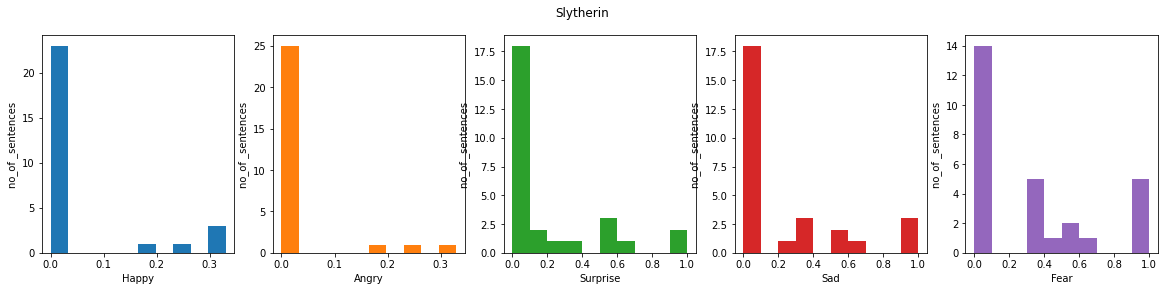

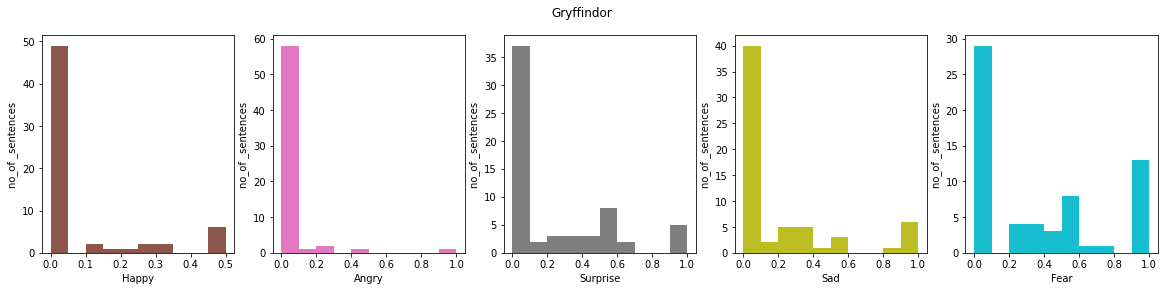

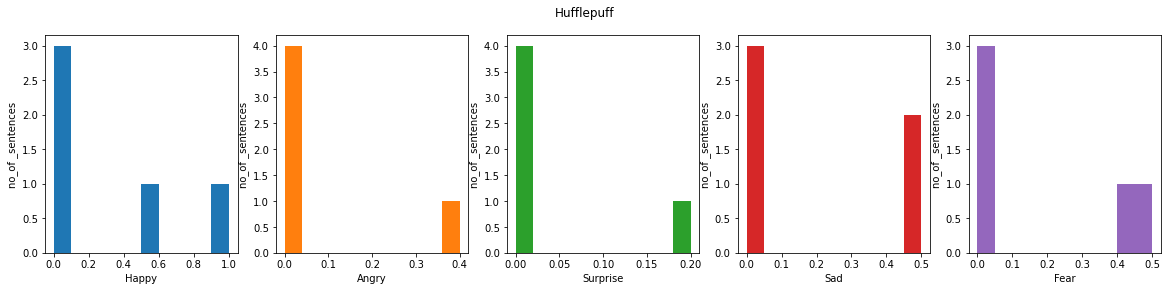

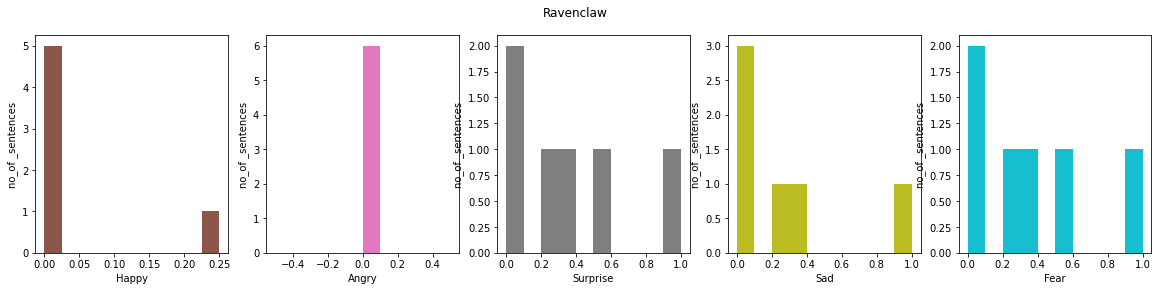

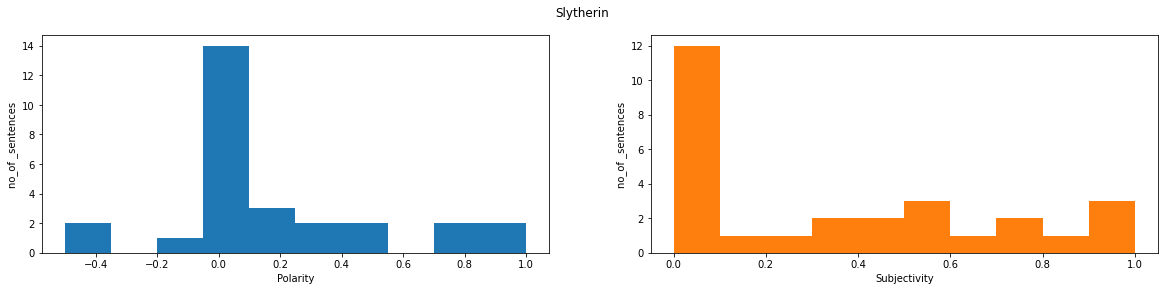

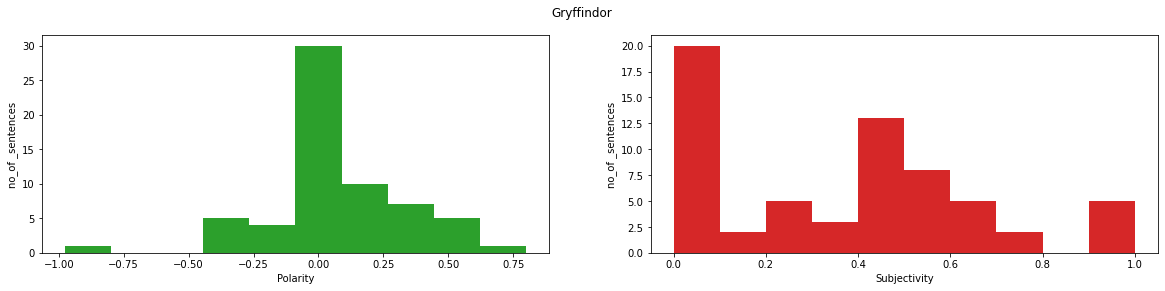

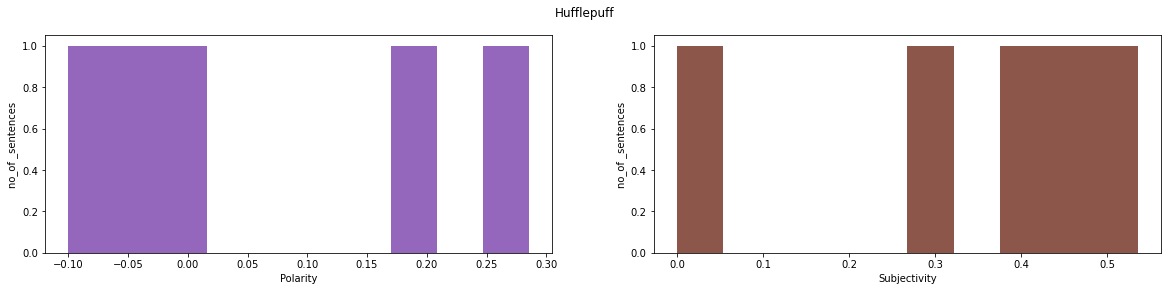

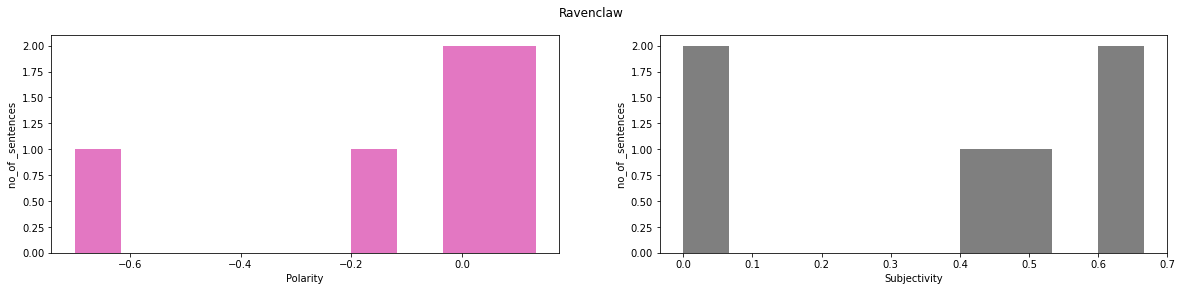

In [18]:
analyze_book(book1_list)

houses_sentence_dict={"Slytherin":[],"Gryffindor":[],"Hufflepuff":[],"Ravenclaw":[]}
houses_sentence_blob={"Slytherin":[],"Gryffindor":[],"Hufflepuff":[],"Ravenclaw":[]}

Slytherin 

           Happy      Angry   Surprise        Sad       Fear
count  62.000000  62.000000  62.000000  62.000000  62.000000
mean    0.042581   0.042581   0.114677   0.134355   0.471774
std     0.124360   0.130885   0.204264   0.239881   0.383100
min     0.000000   0.000000   0.000000   0.000000   0.000000
25%     0.000000   0.000000   0.000000   0.000000   0.000000
50%     0.000000   0.000000   0.000000   0.000000   0.500000
75%     0.000000   0.000000   0.200000   0.237500   0.787500
max     0.500000   0.500000   1.000000   1.000000   1.000000 

Gryffindor 

           Happy      Angry   Surprise        Sad       Fear
count  61.000000  61.000000  61.000000  61.000000  61.000000
mean    0.057377   0.022459   0.149508   0.125246   0.498033
std     0.163319   0.070820   0.261243   0.225282   0.368758
min     0.000000   0.000000   0.000000   0.000000   0.000000
25%     0.000000   0.000000   0.000000   0.000000   0.000000
50%     0.000000   0.000000   0.000000   0.000000   0.5000

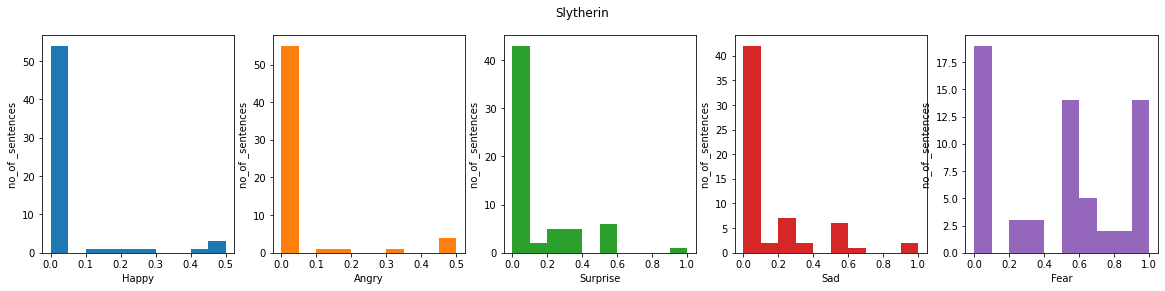

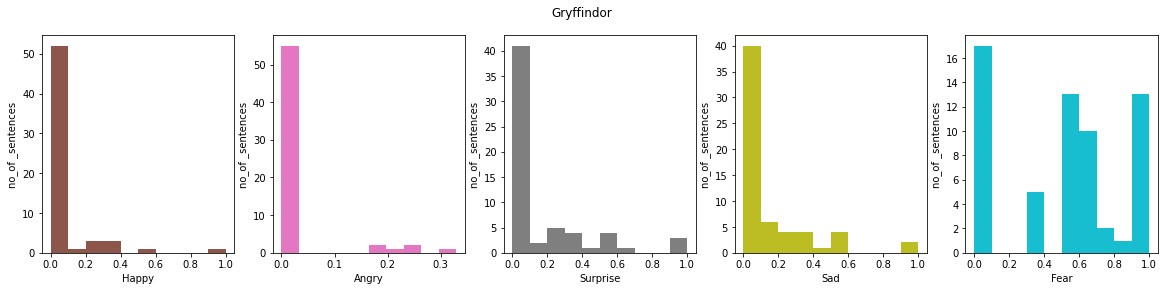

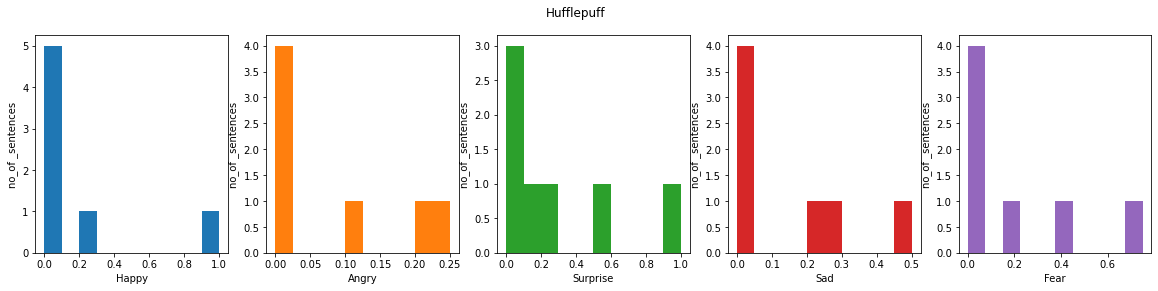

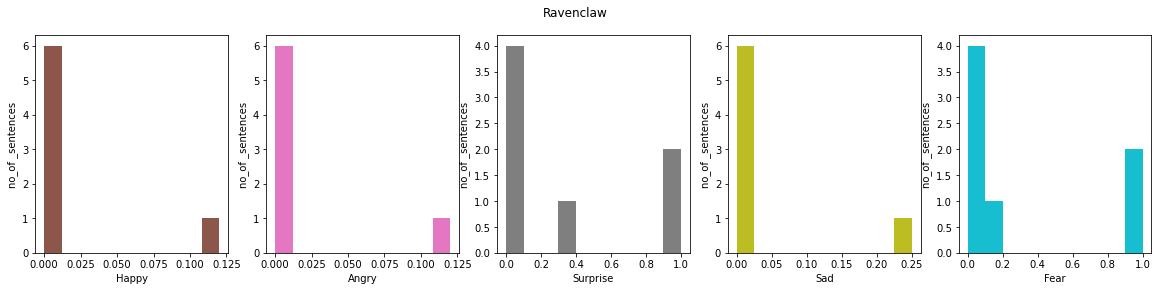

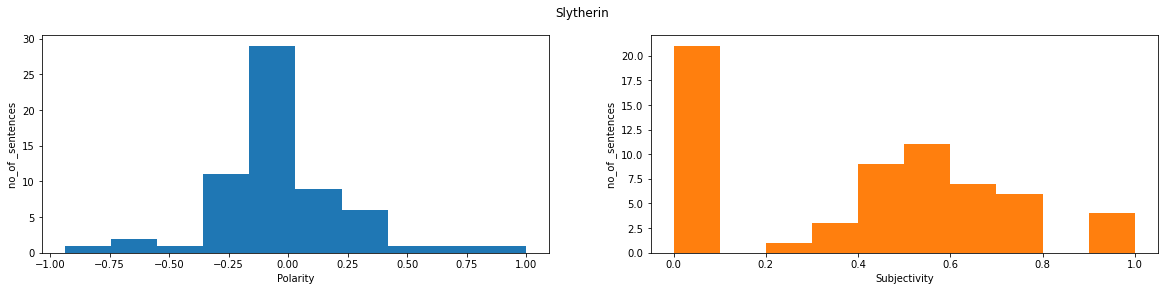

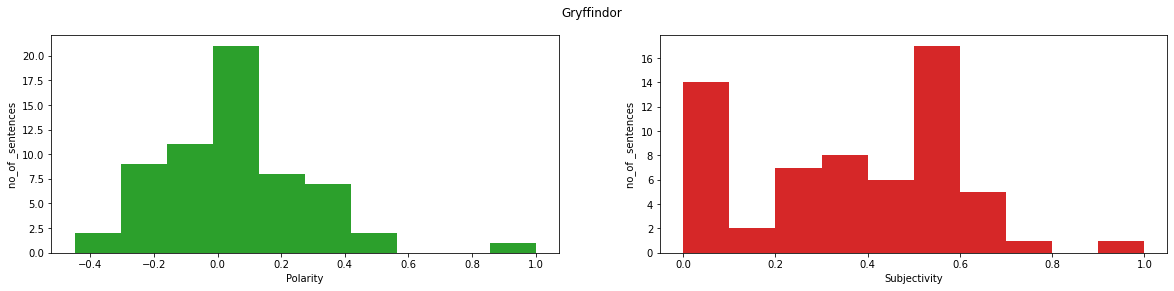

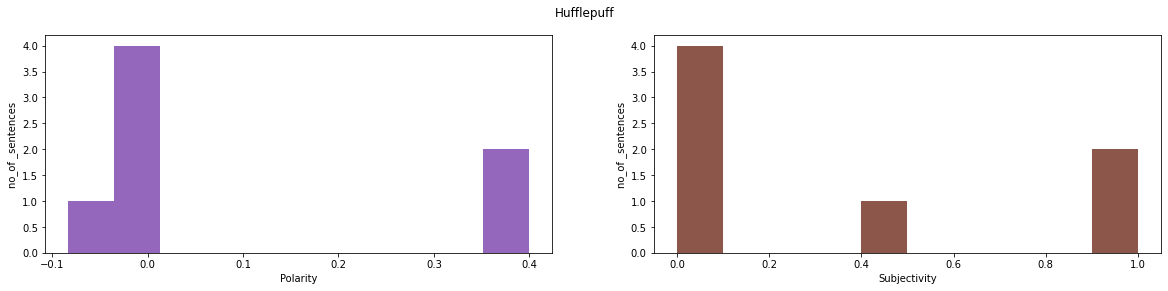

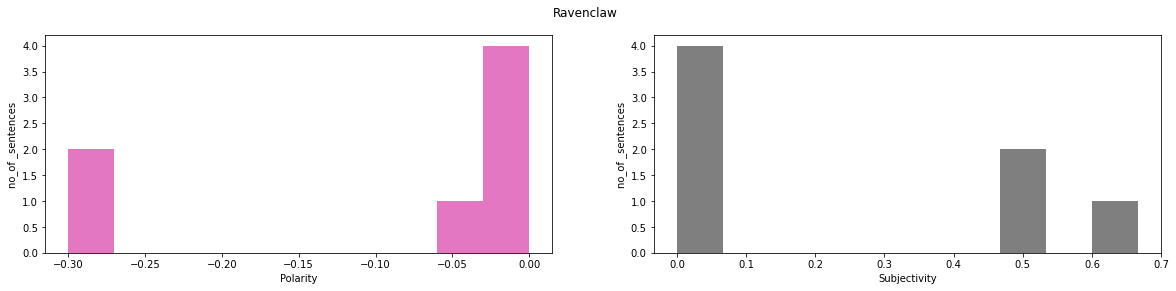

In [19]:
analyze_book(book2_list)

houses_sentence_dict={"Slytherin":[],"Gryffindor":[],"Hufflepuff":[],"Ravenclaw":[]}
houses_sentence_blob={"Slytherin":[],"Gryffindor":[],"Hufflepuff":[],"Ravenclaw":[]}

Slytherin 

           Happy      Angry   Surprise        Sad       Fear
count  32.000000  32.000000  32.000000  32.000000  32.000000
mean    0.070625   0.033125   0.201875   0.188125   0.380937
std     0.168885   0.080500   0.273218   0.307817   0.354850
min     0.000000   0.000000   0.000000   0.000000   0.000000
25%     0.000000   0.000000   0.000000   0.000000   0.000000
50%     0.000000   0.000000   0.000000   0.000000   0.330000
75%     0.000000   0.000000   0.330000   0.250000   0.617500
max     0.500000   0.250000   1.000000   1.000000   1.000000 

Gryffindor 

           Happy      Angry   Surprise        Sad       Fear
count  91.000000  91.000000  91.000000  91.000000  91.000000
mean    0.084396   0.058791   0.157473   0.141209   0.480220
std     0.192949   0.128130   0.271611   0.233632   0.362093
min     0.000000   0.000000   0.000000   0.000000   0.000000
25%     0.000000   0.000000   0.000000   0.000000   0.130000
50%     0.000000   0.000000   0.000000   0.000000   0.5000

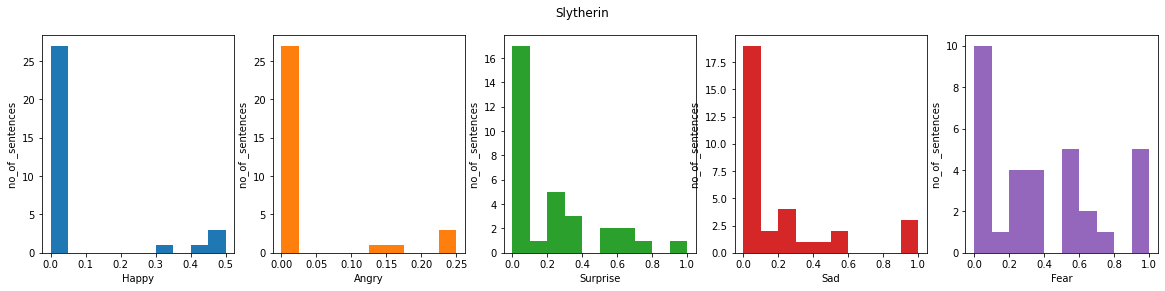

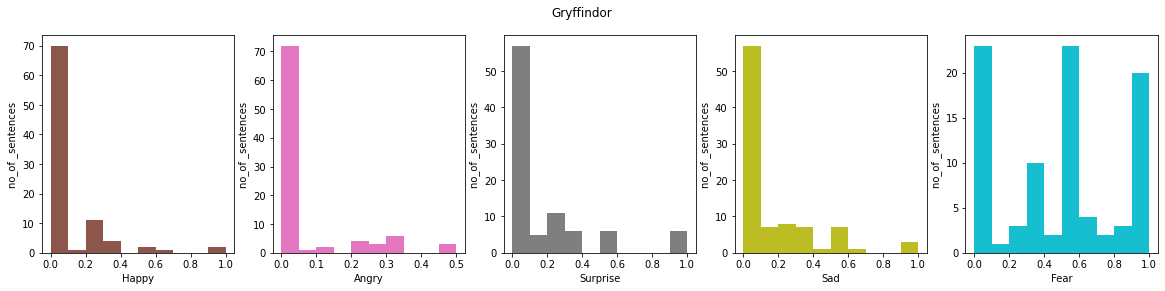

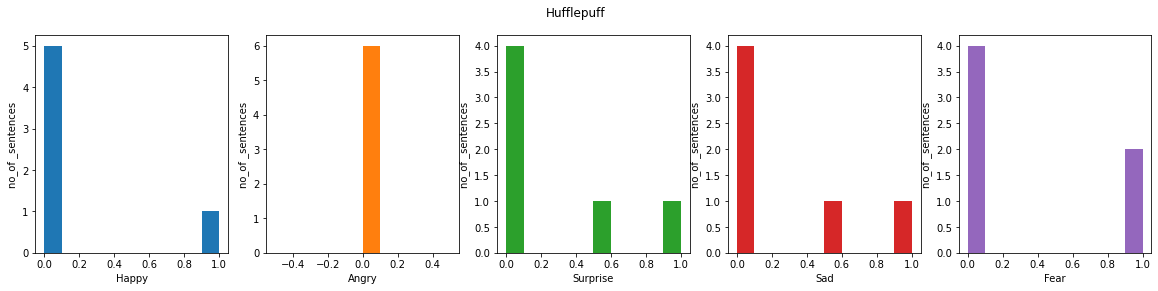

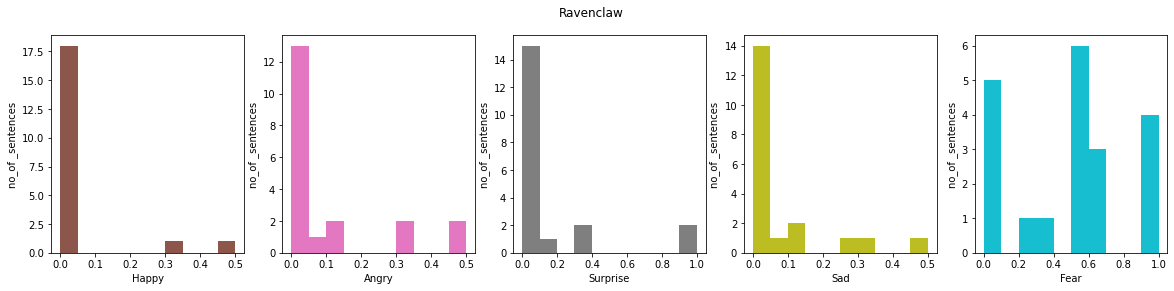

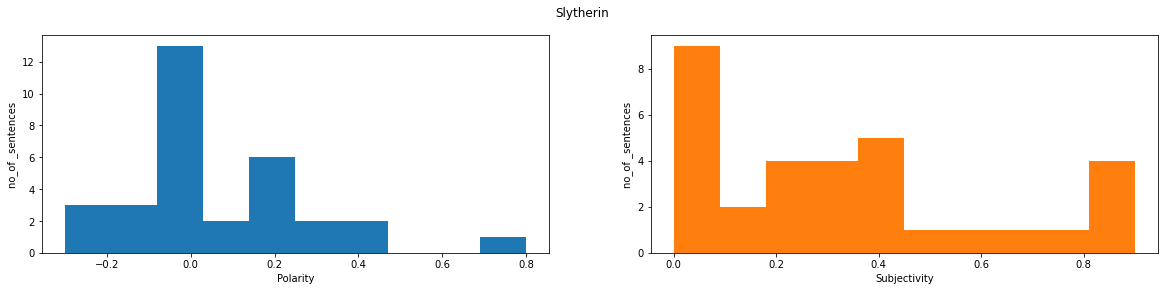

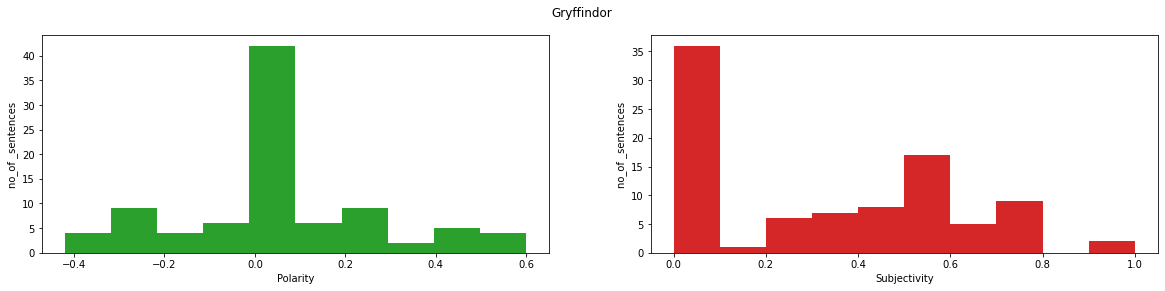

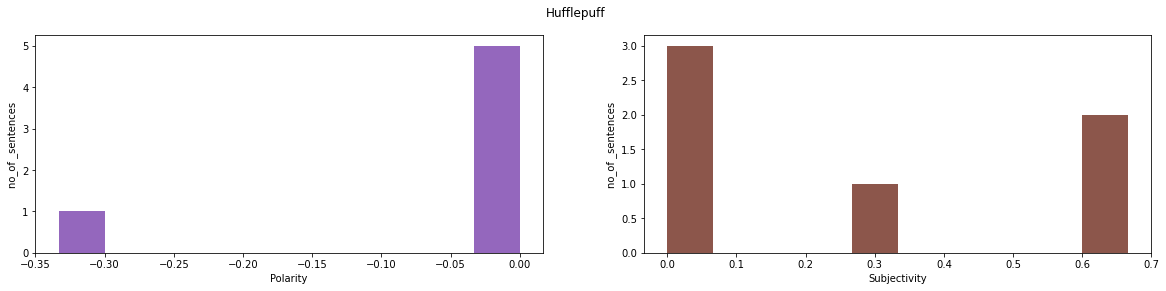

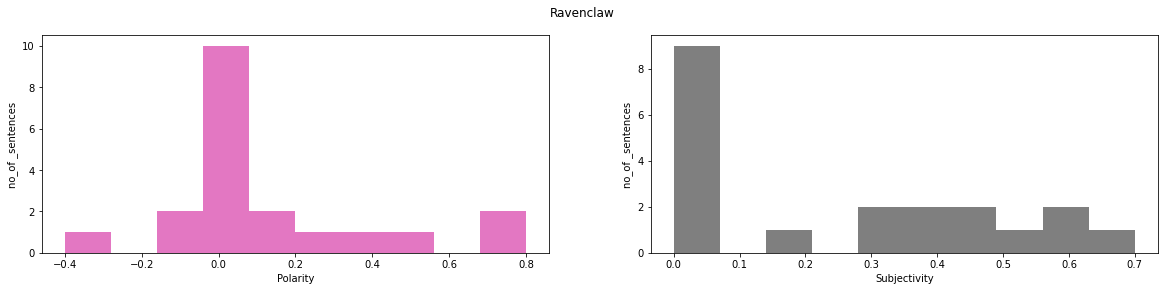

In [20]:
analyze_book(book3_list)

houses_sentence_dict={"Slytherin":[],"Gryffindor":[],"Hufflepuff":[],"Ravenclaw":[]}
houses_sentence_blob={"Slytherin":[],"Gryffindor":[],"Hufflepuff":[],"Ravenclaw":[]}

Slytherin 

           Happy      Angry   Surprise        Sad       Fear
count  21.000000  21.000000  21.000000  21.000000  21.000000
mean    0.088095   0.062381   0.242381   0.101429   0.361905
std     0.236677   0.156586   0.288234   0.225328   0.336684
min     0.000000   0.000000   0.000000   0.000000   0.000000
25%     0.000000   0.000000   0.000000   0.000000   0.000000
50%     0.000000   0.000000   0.200000   0.000000   0.330000
75%     0.000000   0.000000   0.500000   0.120000   0.500000
max     1.000000   0.600000   1.000000   1.000000   1.000000 

Gryffindor 

           Happy      Angry   Surprise       Sad       Fear
count  63.000000  63.000000  63.000000  63.00000  63.000000
mean    0.081429   0.030000   0.205873   0.14746   0.503333
std     0.168081   0.103425   0.339015   0.25466   0.386147
min     0.000000   0.000000   0.000000   0.00000   0.000000
25%     0.000000   0.000000   0.000000   0.00000   0.000000
50%     0.000000   0.000000   0.000000   0.00000   0.500000
75% 

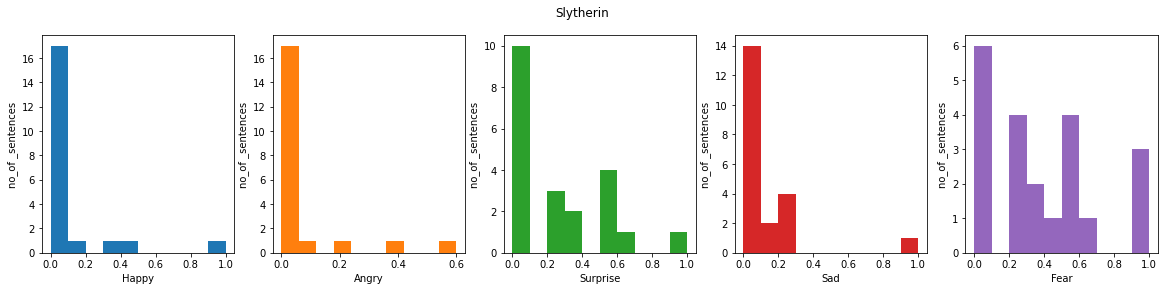

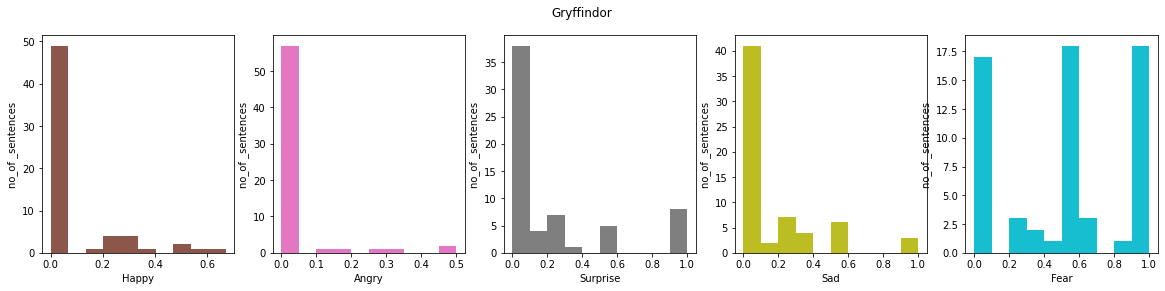

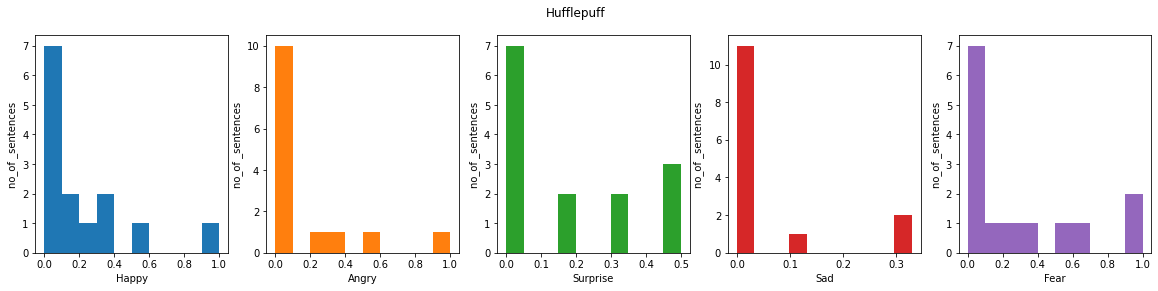

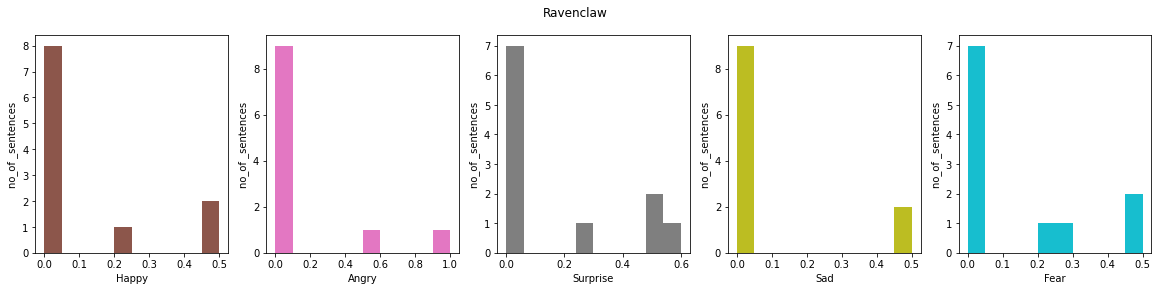

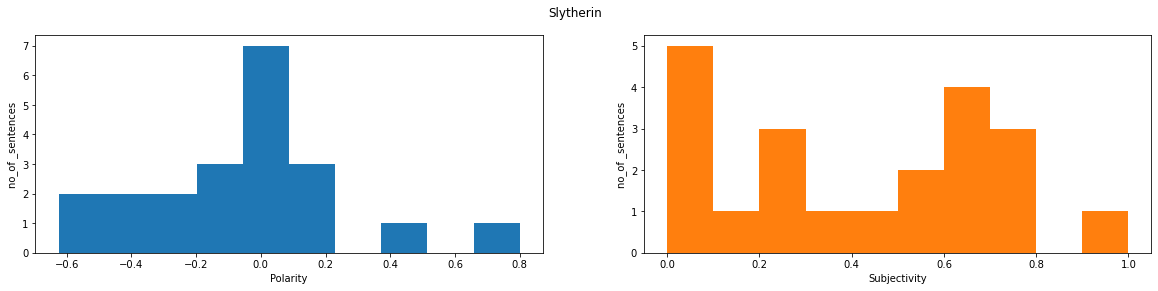

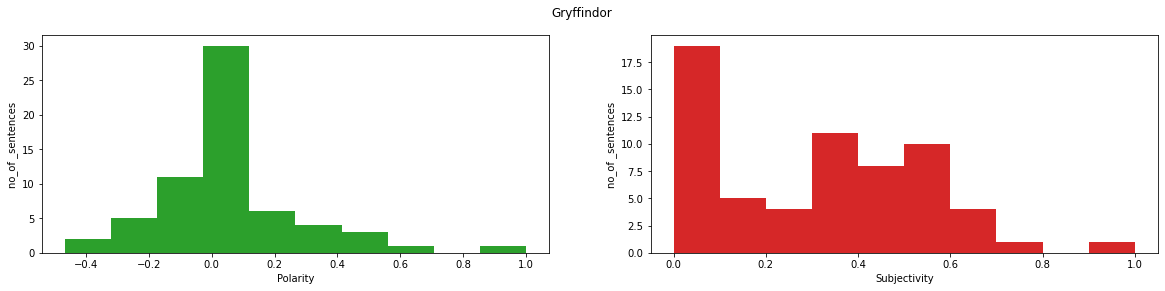

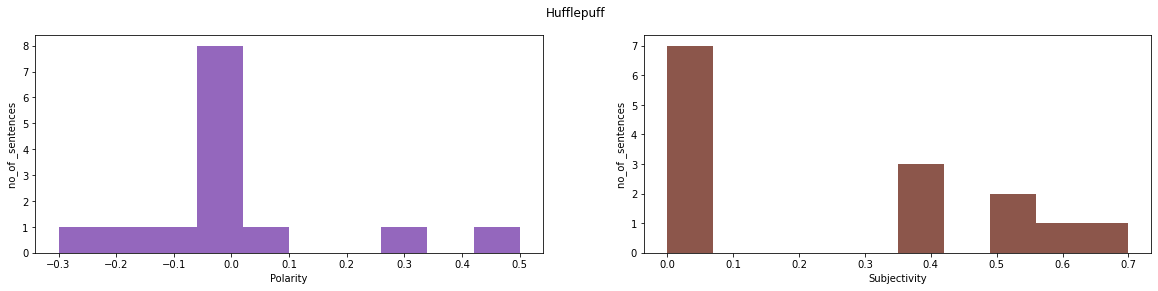

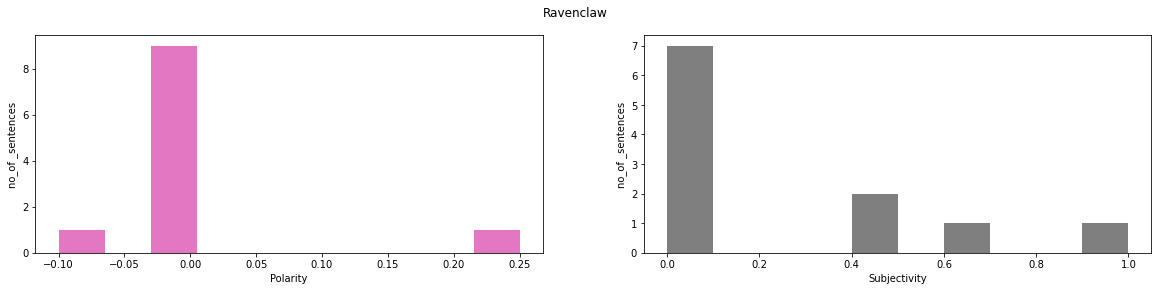

In [21]:
analyze_book(book4_list)

houses_sentence_dict={"Slytherin":[],"Gryffindor":[],"Hufflepuff":[],"Ravenclaw":[]}
houses_sentence_blob={"Slytherin":[],"Gryffindor":[],"Hufflepuff":[],"Ravenclaw":[]}

In [1]:
import os
for root, dirs, files in os.walk("archive"):
    for file in files:
        if file.endswith(".txt"):
             print(os.path.join(root, file))

archive/Book2.txt
archive/Book3.txt
archive/Book1.txt
archive/Book4.txt
archive/Book5.txt
archive/Book7.txt
archive/Book6.txt


In [2]:
import os
potter_paragraphs = []
for root, dirs, files in os.walk("archive"):
    for file in files:
        if file.endswith(".txt"):
            print(os.path.join(root, file))
            with open(os.path.join(root, file), "r") as input:
                paragraphs = input.read().split("\n\n")   #\n\n denotes there is a blank line in between paragraphs.
            #print(paragraphs[0])
            potter_paragraphs.extend(paragraphs)
            
print(len(potter_paragraphs))
print(potter_paragraphs[0])

archive/Book2.txt
archive/Book3.txt
archive/Book1.txt
archive/Book4.txt
archive/Book5.txt
archive/Book7.txt
archive/Book6.txt
54491

J . K . R O W L ! N G 


In [3]:
import os
potter_sentences = []
for root, dirs, files in os.walk("archive"):
    for file in files:
        if file.endswith(".txt"):
            print(os.path.join(root, file))
            with open(os.path.join(root, file), "r") as input:
                sentences = input.read().split(". ")   #. denotes end of sentence
            potter_sentences.extend(sentences)
            
print(len(potter_sentences))
print(potter_sentences[0])

archive/Book2.txt
archive/Book3.txt
archive/Book1.txt
archive/Book4.txt
archive/Book5.txt
archive/Book7.txt
archive/Book6.txt
69828

J 


<b>Processing the Sentence into Data Frames for some Exploratory Data Analysis</b>

In [6]:
processed_sentences = []

for s in potter_sentences:
    # Remove all the special characters
    processed_sentence = re.sub(r'\W', ' ', str(s))

    # remove all single characters
    processed_sentence= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_sentence)

    # Remove single characters from the start
    processed_sentence = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_sentence) 

    # Substituting multiple spaces with single space
    processed_sentence = re.sub(r'\s+', ' ', processed_sentence, flags=re.I)

    # Removing prefixed 'b'
    processed_sentence = re.sub(r'^b\s+', '', processed_sentence)

    # Converting to Lowercase
    processed_sentence = processed_sentence.lower().strip()
    
    if len(processed_sentence)>3:
        processed_sentences.append(processed_sentence)
    

In [7]:
import pandas as pd
potter_df = pd.DataFrame(processed_sentences, columns = ['Sentence'])
potter_df[0:1020]

,Sentence
0,r w n harry potter the worst birthday not for ...
1,vernon dursley had been woken in the early hou...
2,third time this week he roared across the table
3,if you can control that owl it ll have to go h...
4,she bored he said
...,...
1015,she was glaring at malfoy
1016,potter you ve got yourself girlfriend drawled ...
1017,ginny went scarlet as ron and hermione fought ...
1018,oh it you said ron looking at malfoy as if he ...


Text(0.5, 1.0, 'Distribution of number of words in each sentence')

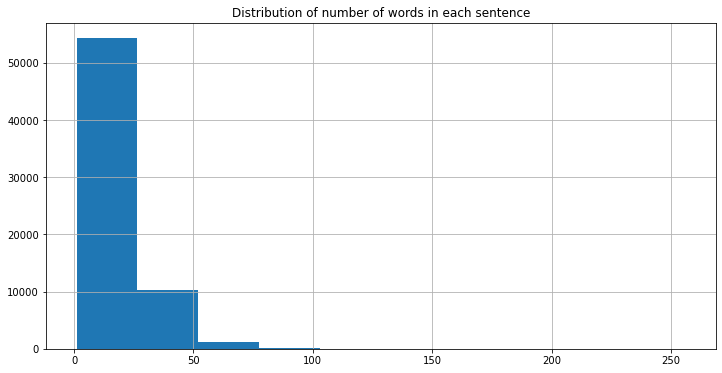

In [8]:
potter_df['NumWords'] = potter_df['Sentence'].apply(lambda x: len(x.split()))
potter_df[['NumWords']].hist(figsize=(12, 6), bins=10, xlabelsize=10, ylabelsize=10);
plt.title("Distribution of number of words in each sentence")

In [9]:
potter_df['Sentence']


0        r w n harry potter the worst birthday not for ...
1        vernon dursley had been woken in the early hou...
2          third time this week he roared across the table
3        if you can control that owl it ll have to go h...
4                                        she bored he said
                               ...                        
65982    but mate you re going to have to come round my...
65983            yeah we shouldn miss that he said finally
65984    his hand closed automatically around the fake ...
65985    page 730 harry potter and the half blood prince k
65986                                              rowling
Name: Sentence, Length: 65987, dtype: object

In [10]:
all_words = ''.join([word for word in potter_df['Sentence']]).replace('\n', ' ')
all_words[0:1000]

'r w n harry potter the worst birthday not for the first time an argument had broken out over breakfast at number four privet drivevernon dursley had been woken in the early hours of the morning by loud hooting noise from his nephew harry roomthird time this week he roared across the tableif you can control that owl it ll have to go harry tried yet again to explainshe bored he saidshe used to flying around outsideif could just let her out at night do look stupid snarled uncle vernon bit of fried egg dangling from his bushy mustacheknow what 11 happen if that owl let out he exchanged dark looks with his wife petuniaharry tried to argue back but his words were drowned by long loud belch from the dursleys son dudleypage 2 harry potter and the chamber of secrets krowling want more bacon there more in the frying pan sweetums said aunt petunia turning misty eyes on her massive sonwe must build you up while we ve got the chancei don like the sound of that school foodnonsense petunia never wen

<b>Generating Word cloud for the first 1000 sentences</b>

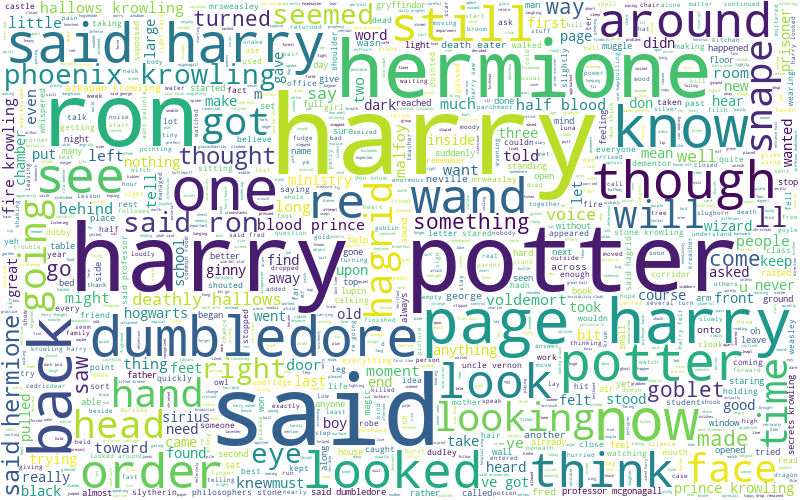

In [42]:
from wordcloud import WordCloud

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=500, max_font_size=110, background_color="white", max_words=10000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(all_words)

# Visualize the word cloud
wordcloud.to_image()

<b>Generating Word cloud for the entire books</b>

<class 'str'>


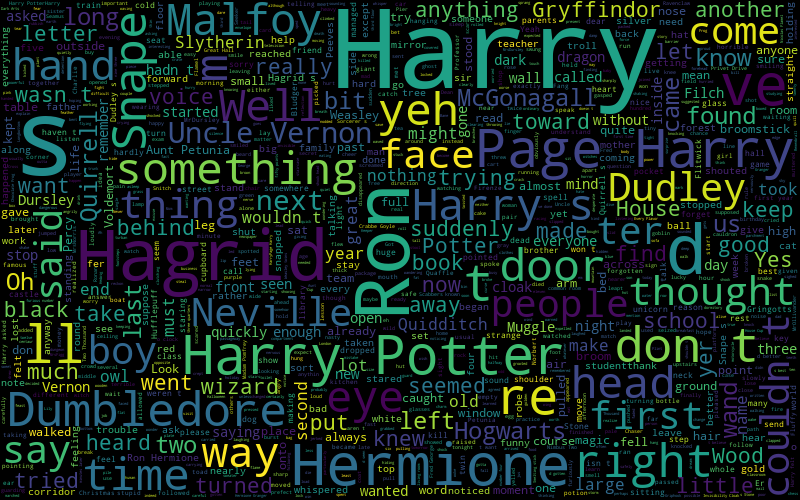

In [43]:
from wordcloud import WordCloud
book_cleaned=remove_stopwords_from_book(book1_list)

from wordcloud import WordCloud

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=500, max_font_size=110, background_color="black", max_words=10000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(book_cleaned)

# Visualize the word cloud
wordcloud.to_image()

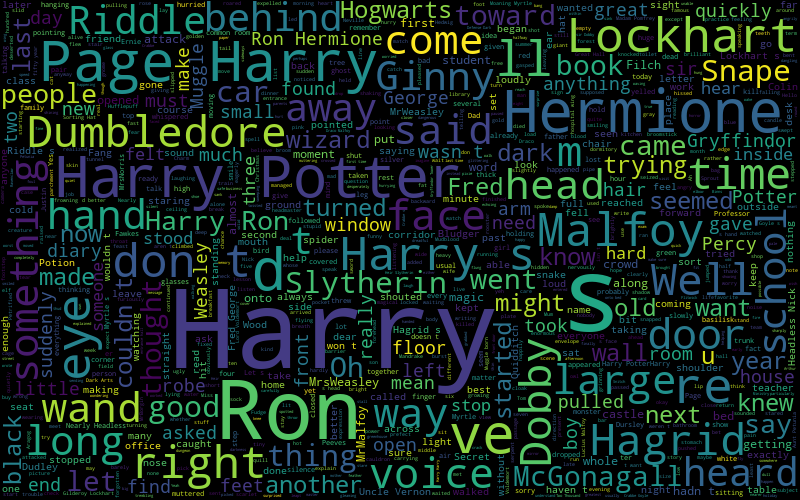

In [44]:
from wordcloud import WordCloud
book_cleaned=remove_stopwords_from_book(book2_list)

from wordcloud import WordCloud

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=500, max_font_size=110, background_color="black", max_words=10000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(book_cleaned)

# Visualize the word cloud
wordcloud.to_image()

<b> Normalizing the text and plotting maximum occured words</b>

In [45]:
import re
NON_ALPHANUM = re.compile(r'[\W]')
NON_ASCII = re.compile(r'[^a-z0-1\s]')
def normalize_texts(texts):
    normalized_texts = ''
    lower = texts.lower()
    no_punctuation = NON_ALPHANUM.sub(r' ', lower)
    no_non_ascii = NON_ASCII.sub(r'', no_punctuation)
    return no_non_ascii
  
potter_df['Sentence2'] = potter_df['Sentence'].apply(normalize_texts)
potter_df.head()
potter_df['Sentence2'] = potter_df['Sentence2'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

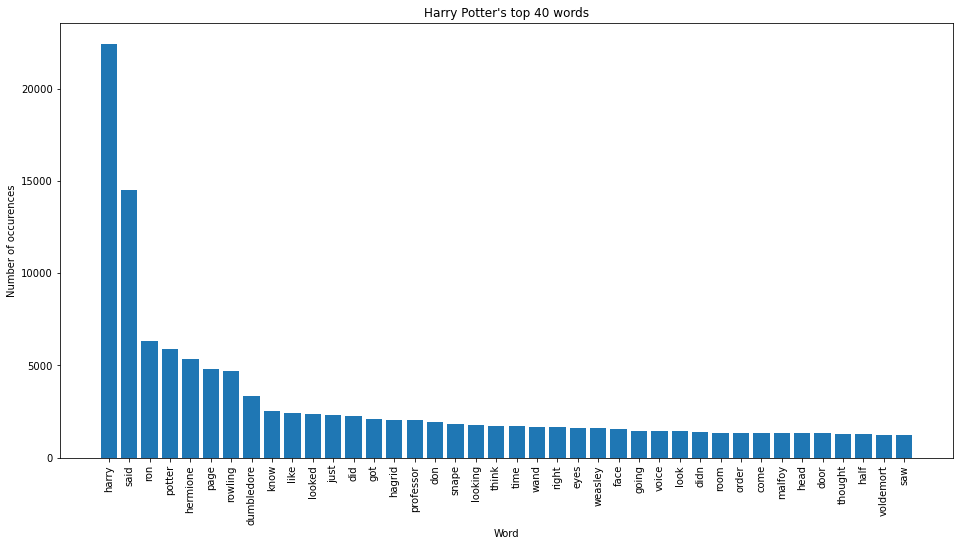

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

def get_top_n_words(corpus, n=10):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

words = []
word_values = []
for i,j in get_top_n_words(potter_df['Sentence2'], 40):
    words.append(i)
    word_values.append(j)
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title("Harry Potter's top 40 words");
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

## NETWORK MODEL 

# Page Rank



```

```

In [8]:
from sentence_transformers import SentenceTransformer

In [9]:
bmodel = SentenceTransformer('all-MiniLM-L6-v2') #384 dims

In [ ]:
bert_embeddings = bmodel.encode(processed_sentences[1:2000])
bert_embeddings.shape

In [ ]:
#Print the embeddings
for i, (sentence, embedding) in enumerate(zip(processed_sentences[1:2000], bert_embeddings)):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")
    if i == 3: break

In [ ]:
import numpy as np
a = bert_embeddings[0]
b = bert_embeddings[1]
cos_sim = (a @ b.T) / (np.linalg.norm(a)*np.linalg.norm(b))
cos_sim

In [ ]:
bert_embeddings.shape

In [ ]:
from tqdm import tqdm
#M = np.zeros((1933, 1933))
M = np.eye(1999)

for i,a in tqdm(enumerate(bert_embeddings)):
    for j,b in enumerate(bert_embeddings):
        if i != j:
            M[i,j] = (a @ b.T) / (np.linalg.norm(a)*np.linalg.norm(b))

In [ ]:
import networkx

similarity_graph = networkx.from_numpy_array(M)
similarity_graph

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14, 8))
networkx.draw_networkx(similarity_graph, node_color='lime')

In [ ]:
scores = networkx.pagerank(similarity_graph)
nx_ranked_sentences = sorted(((score, index) for index, score 
                                            in scores.items()), 
                          reverse=True)
nx_ranked_sentences[:10]

In [ ]:
processed_sentences[375]

In [ ]:
for i in range(10):
    print(processed_sentences[nx_ranked_sentences[i][1]])
    print('----------')

## Clustering


K-Medoids is a clustering algorithm resembling the K-Means clustering technique. It falls under the category of unsupervised machine learning. It majorly differs from the K-Means algorithm in terms of the way it selects the clusters’ centres. The former selects the average of a cluster’s points as its centre (which may or may not be one of the data points) while the latter always picks the actual data points from the clusters as their centres (also known as ‘exemplars’ or ‘medoids’). K-Medoids also differs in this respect from the K-Medians algorithm whic,h is the same as K-means, except that it chooses the medians (instead of means) of the clusters as centres.

Mean of the data points is a measure that gets highly affected by the extreme points. So in K-Means algorithm, the centroid may get shifted to a wrong position and hence result in incorrect clustering if the data has outliers because then other points will move away from  . On the contrary, a medoid in the K-Medoids algorithm is the most central element of the cluster, such that its distance from other points is minimum. Since medoids do not get influenced by extremities, the K-Medoids algorithm is more robust to outliers and noise than K-Means algorithm.

Randomly pick `k` points from the input data to create `k` clusters. The correctness of the choice of k’s value can be assessed using methods such as the Silhouette method. Each data point gets assigned recusively to the cluster to which its nearest medoid belongs. The algorithm is as follows:

For each data point of cluster i, its distance from all other data points is computed and added. The point of ith cluster for which the computed sum of distances from other points is minimal is assigned as the medoid for that cluster. Repeat until convergence is reached i.e. the medoids stop moving.

The complexity of the K-Medoids algorithm comes to $O(N^2CT)$ where N, C and T denote the number of data points, number of clusters and number of iterations respectively. With similar notations, the complexity K-Means algorithm can be given as $O(NCT)$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits

In [ ]:
digits.data.shape

In [ ]:
num_digits = len(np.unique(digits.target))
num_digits

In [ ]:
np.std(bert_embeddings[0])

In [ ]:
bert_embeddings_std = scale(bert_embeddings)

In [ ]:
bert_embeddings_red = PCA(n_components=2).fit_transform(bert_embeddings_std)

In [ ]:
h = 0.02 #step size of the mesh 
#Minimum and maximum x-coordinates
xmin, xmax = bert_embeddings_red[:, 0].min() - 1, bert_embeddings_red[:, 0].max() + 1
#Minimum and maximum y-coordinates
ymin, ymax = bert_embeddings_red[:, 1].min() - 1, bert_embeddings_red[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax, h))

In [ ]:
models = [
     (
         KMedoids(metric="manhattan", n_clusters=num_digits, 
         init="heuristic", max_iter=2),"Manhattan metric",
     ),
     (
         KMedoids(metric="euclidean", n_clusters=num_digits,  
         init="heuristic", max_iter=2),"Euclidean metric",
     ),
     (KMedoids(metric="cosine", n_clusters=num_digits, init="heuristic", 
      max_iter=2), "Cosine metric", ),
 ]
models

In [ ]:
#number of rows = integer(ceiling(number of model variants/2))
num_rows = int(np.ceil(len(models) / 2.0))
#number of columns
num_cols = 2 

In [ ]:
#Clear the current figure first (if any)
plt.clf()

#Initialize dimensions of the plot
plt.figure(figsize=(15,10))

In [ ]:
for i, (model, description) in enumerate(models):
    # Fit each point in the mesh to the model
    model.fit(bert_embeddings_red)
    
    #Predict the labels for points in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result  into a color plot
    Z = Z.reshape(xx.shape)
   
    #Subplot for the ith model variant
    plt.subplot(num_cols, num_rows, i + 1)
   
    #Display the subplot
    plt.imshow(
         Z,    #data to be plotted
         interpolation="nearest",
        #bounding box coordinates (left,right,bottom,top)
         extent=(xx.min(), xx.max(), yy.min(), yy.max()),
         cmap=plt.cm.Paired,  #colormap
         aspect="auto", #aspect ratio of the axes
         origin="lower",  #set origin as lower left corner of the axes
    )
    plt.plot(
         bert_embeddings_red[:, 0], bert_embeddings_red[:, 1], "k.", markersize=2, alpha=0.3
    )
        
    # Plot the centroids as white cross marks
    centroids = model.cluster_centers_
    plt.scatter(
         centroids[:, 0],
         centroids[:, 1],
         marker="x",
         s=169,  #marker’s size (points^2)
         linewidths=3, #width of boundary lines
         color="w",  #white color for centroids markings
         zorder=10,  #drawing order of axes
    )
    
    #describing text of the tuple will be title of the subplot
    plt.title(description)  
    plt.xlim(xmin, xmax)  #limits of x-coordinates
    plt.ylim(ymin, ymax)  #limits of y-coordinates
    plt.xticks(())   
    plt.yticks(())
    
#Upper title of the whole plot
plt.suptitle(
    #Text to be displayed
    "K-Medoids algorithm implemented with different metrics\n\n",
    fontsize=20,  #size of the fonts
)
plt.show()

In [ ]:
centroids

In [ ]:
centroids = []
for i, (model, description) in enumerate(models):
    model.fit(bert_embeddings_std)
    centroids.append(model.cluster_centers_)

In [ ]:
centroid_indeces = []

for i in range(10):
    c = centroids[2][i]
    for j in range(bert_embeddings_std.shape[0]):
        if np.allclose(c, bert_embeddings_std[j]):
            centroid_indeces.append(j)
            break

In [ ]:
centroid_indeces

In [ ]:
for i in centroid_indeces:
    print(i, ' -------')
    print(processed_sentences[i])
    print('---------')

## COMPUTATIONAL MODEL

Using ***Negative Binomial*** we try analyse how the most frequent words impact the emotion on the sentence.

You can install the libraries required to run the model
pip install fuzzywuzzy
pip install WordCloud
pip install STOPWORDS
pip install distance #internally used by stopwords

In [ ]:
""
# First things first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# libraries for preprocessing
import re
from bs4 import BeautifulSoup
import nltk
nltk.download("wordnet")
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
# from fuzzywuzzy import fuzz
# from fuzzywuzzy import process
import distance
from PIL import Image
import requests
import spacy
from spacy.lang.en import English


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
def read_book(title_path):
    with open(title_path, "r", encoding ="utf8") as current_file:
        text = current_file.read()
        text = text.replace("\n", "").replace("\r", "")
    return text

In [ ]:
book1 = read_book('./archive/Book1.txt')
book2 = read_book('./archive/Book2.txt')
book3 = read_book('./archive/Book3.txt')


In [ ]:
book1  

'/ THE BOY WHO LIVED Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t hold with such nonsense. Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursley s had a small son called Dudley and in their opinion there was no finer boy anywhere. The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They didn’t think they could bear it if anyone found out about the Potters. Mrs. Potter was Mrs. Dursley’s sister, but they hadn’t

### Clean the dataset

1. Generate the STOPWORDS 
2. Create a dictory from contraction words
3. Break the entire book into sentences
4. clean every sentences which were processed

In [ ]:
# Saving stopwords
stopwords = set(STOPWORDS)
stopwords.remove('no') #removing negation from tweets as they contribute a lot
stopwords.remove('nor')
stopwords.remove('not')

In [ ]:
contraction = { "ain't": "is not","aren't": "are not","'re": " are","can't": "cannot","can't've": "cannot have",
"'cause": "because","could've": "could have","couldn't": "could not","couldn't've": "could not have","didn't": "did not",
"doesn't": "does not","don't": "do not","hadn't": "had not","hadn't've": "had not have","hasn't": "has not","haven't": "have not",
"'ve": " have","he'd": "he would","he'd've": "he would have","he'll": "he will","he'll've": "he will have","he's": "he is",
"how'd": "how did","how'd'y": "how do you","how'll": "how will","how's": "how is","I'd": "I had","I'd've": "I would have","I'll": "I will",
"I'll've": "I will have","I'm": "I am","I've": "I have","isn't": "is not","it'd": "it would","it'd've": "it would have",
"it'll": "it will","it'll've": "it will have","it's": "it is","i'm":"i am","i've": "i have","i'd": "i had","let's": "let us",
"ma'am": "madam","mayn't": "may not","might've": "might have","mightn't": "might not","mightn't've": "might not have","must've": "must have",
"mustn't": "must not","mustn't've": "must not have","needn't": "need not","needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
"oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not","shan't've": "shall not have","she'd": "she had",
"she'd've": "she would have","she'll": "she will","she'll've": "she will have","she's": "she is","should've": "should have",
"shouldn't": "should not","shouldn't've": "should not have","so've": "so have","so's": "so is","that'd": "that would","that'd've": "that would have",
"that's": "that is","there'd": "there would","there'd've": "there would have","there's": "there is","they'd": "they had","they'd've": "they would have",
"they'll": "they will","they'll've": "they will have","they're": "they are","they've": "they have","to've": "to have",
"wasn't": "was not","we'd": "we would","we'd've": "we would have","we'll": "we will","we'll've": "we will have","we're": "we are",
"we've": "we have","weren't": "were not","what'll": "what will","what'll've": "what will have","what're": "what are",
"what's": "what is","what've": "what have","when's": "when is","when've": "when have","where'd": "where did","where's": "where is",
"where've": "where have","who'll": "who will","who'll've": "who will have","who's": "who is","who've": "who have","why's": "why is",
"why've": "why have","will've": "will have","won't": "will not","won't've": "will not have","would've": "would have",
"wouldn't": "would not","wouldn't've": "would not have","y'all": "you all","y'all'd": "you all would","y'all'd've": "you all would have",
"y'all're": "you all are","y'all've": "you all have","you'd": "you would","you'd've": "you would have","you'll": "you will",
"you'll've": "you will have","you're": "you are","you've": "you have"
}

In [ ]:
book1

'/ THE BOY WHO LIVED Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t hold with such nonsense. Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursley s had a small son called Dudley and in their opinion there was no finer boy anywhere. The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They didn’t think they could bear it if anyone found out about the Potters. Mrs. Potter was Mrs. Dursley’s sister, but they hadn’t

In [ ]:
# Breaking down the book into sentences

nlp_simple = English()
nlp_better = spacy.load('en_core_web_sm')

bookSentences = []
#breaking the book into sentences
for nlp in [nlp_better]:
    for i in nlp(book1).sents:
       bookSentences.append(i)

In [ ]:
bookSentences

[/ THE BOY WHO LIVED Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much.,
 They were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t hold with such nonsense.,
 Mr. Dursley was the director of a firm called Grunnings, which made drills.,
 He was a big, beefy man with hardly any neck, although he did have a very large mustache.,
 Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors.,
 The Dursley s had a small son called Dudley and in their opinion there was no finer boy anywhere.,
 The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it.,
 They didn’t think they could bear it if anyone found out about the Potters.,
 Mrs. Potter was Mrs. Dursley’s sister,

In [ ]:
def contractions(text):
    contract_removed = []
    for word in text.split():
        if word in contraction:
            contract_removed.append(contraction.get(word))
        else:
            contract_removed.append(word)
        
    return " ".join(contract_removed)


def clean(data):
    pre_processed_text = []
    for text in data:
        text = str(text)
        # sentence = text.lower()
        sentence = contractions(text)  # expanding contractions
        
        sentence = re.sub("\.", "",sentence)  #removing period
        sentence = sentence.replace(r"J\.K\.\sRowling", "JKRowling")   # replacing some symbols with text
        sentence = re.sub(r"[^a-zA-Z\s\.]","", sentence)  
                                
        # sentence = " ".join(word for word in sentence.split() if word not in STOPWORDS) # removing stopwords
        
          # removing non alphabets Characters
        
        stem = WordNetLemmatizer()   # Lemmatizing words
        sentence = " ".join(stem.lemmatize(word) for word in sentence.split())

        pre_processed_text.append(sentence)
        
    return pre_processed_text

In [ ]:
cleanedSentences = clean(bookSentences)

In [ ]:
#Breaking the words into tokens as well as check the stop words
import tqdm
filtered_sentences = []

for sentence in tqdm.tqdm(cleanedSentences):
  sent = []
  sentence = nlp(sentence) # convert the sentence to spacy object
  for token in sentence:
    # if token.pos_ == "NOUN" or token.pos_ == "ADJ" or token.pos_ == "ADV" or token.pos_ == "VERB":
    if str(token) not in STOPWORDS and len(str(token)) > 2:
      sent.append(str(token).lower())
  filtered_sentences.append(sent)

100%|██████████| 6439/6439 [00:57<00:00, 112.96it/s]


#### We successfully divide the books into sentence and further converted it to tokens

For example
Sentence :- They were the last people youd expect to be involved in anything strange or mysterious because they just didnt hold with such nonsense

Tokenized Sentences: ['they', 'last', 'people', 'expect','involved', 'anything', 'strange', 'mysterious','hold', 'nonsense']

In [ ]:
filtered_sentences[1]

['they',
 'last',
 'people',
 'expect',
 'involved',
 'anything',
 'strange',
 'mysterious',
 'hold',
 'nonsense']

In [ ]:
cleanedSentences[1]

'They were the last people youd expect to be involved in anything strange or mysterious because they just didnt hold with such nonsense'

In [ ]:
!pip install flair #installing for sentmental analysis

#### We are using flair library perform sentiment analysis for each sentence

Install flair module before running the code to avoid erros (pip install flair).

|Sentiment value | Meaning |
|---|---|
|0| negative sentiments|
|1| positive sentiments|
|2| neutral sentiments|





In [ ]:
import flair
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

sentiment = []

for sentence in tqdm.tqdm(cleanedSentences):
  s = flair.data.Sentence(sentence)
  flair_sentiment.predict(s) #preict the sentiments
  total_sentiment = s.labels # results
  if len(total_sentiment) > 0:
    if total_sentiment[0].to_dict()["confidence"] >= 0.7:
      sentiment.append(1) # positive
    elif total_sentiment[0].to_dict()["confidence"] <= 0.4:
      sentiment.append(0) # negative
    else:
      sentiment.append(2) #neutral
  else:
    sentiment.append("NaN") # if is NAN

2022-12-13 13:57:44,935 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


  2%|▏         | 149/6439 [00:09<07:00, 14.97it/s]

2022-12-13 13:57:56,989 Warning: An empty Sentence was created! Are there empty strings in your dataset?


  3%|▎         | 197/6439 [00:12<05:55, 17.57it/s]

2022-12-13 13:57:59,992 Warning: An empty Sentence was created! Are there empty strings in your dataset?


  7%|▋         | 460/6439 [00:28<06:35, 15.12it/s]

2022-12-13 13:58:16,364 Warning: An empty Sentence was created! Are there empty strings in your dataset?


 11%|█         | 705/6439 [00:44<05:15, 18.15it/s]

2022-12-13 13:58:32,241 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2022-12-13 13:58:32,332 Warning: An empty Sentence was created! Are there empty strings in your dataset?


 11%|█▏        | 735/6439 [00:46<07:05, 13.41it/s]

2022-12-13 13:58:34,043 Warning: An empty Sentence was created! Are there empty strings in your dataset?


 14%|█▍        | 912/6439 [00:57<05:26, 16.92it/s]

2022-12-13 13:58:45,056 Warning: An empty Sentence was created! Are there empty strings in your dataset?


 17%|█▋        | 1074/6439 [01:11<05:54, 15.12it/s]

2022-12-13 13:58:58,863 Warning: An empty Sentence was created! Are there empty strings in your dataset?


 26%|██▌       | 1675/6439 [02:03<05:20, 14.87it/s]

2022-12-13 13:59:50,752 Warning: An empty Sentence was created! Are there empty strings in your dataset?


 31%|███       | 1970/6439 [02:23<04:07, 18.08it/s]

2022-12-13 14:00:10,594 Warning: An empty Sentence was created! Are there empty strings in your dataset?


 32%|███▏      | 2063/6439 [02:31<07:03, 10.35it/s]

2022-12-13 14:00:18,986 Warning: An empty Sentence was created! Are there empty strings in your dataset?


 43%|████▎     | 2777/6439 [03:17<04:24, 13.84it/s]

2022-12-13 14:01:05,502 Warning: An empty Sentence was created! Are there empty strings in your dataset?


 47%|████▋     | 3052/6439 [03:35<03:34, 15.80it/s]

2022-12-13 14:01:23,141 Warning: An empty Sentence was created! Are there empty strings in your dataset?


 51%|█████     | 3284/6439 [03:51<03:32, 14.83it/s]

2022-12-13 14:01:39,466 Warning: An empty Sentence was created! Are there empty strings in your dataset?


 52%|█████▏    | 3331/6439 [03:56<03:47, 13.66it/s]

2022-12-13 14:01:43,966 Warning: An empty Sentence was created! Are there empty strings in your dataset?


 59%|█████▉    | 3810/6439 [04:32<02:33, 17.16it/s]

2022-12-13 14:02:19,676 Warning: An empty Sentence was created! Are there empty strings in your dataset?


 66%|██████▌   | 4236/6439 [04:58<01:43, 21.25it/s]

2022-12-13 14:02:45,573 Warning: An empty Sentence was created! Are there empty strings in your dataset?


 71%|███████   | 4550/6439 [05:15<01:46, 17.79it/s]

2022-12-13 14:03:03,387 Warning: An empty Sentence was created! Are there empty strings in your dataset?


 71%|███████   | 4577/6439 [05:17<01:40, 18.47it/s]

2022-12-13 14:03:04,829 Warning: An empty Sentence was created! Are there empty strings in your dataset?


 80%|████████  | 5170/6439 [05:51<02:40,  7.92it/s]

2022-12-13 14:03:38,802 Warning: An empty Sentence was created! Are there empty strings in your dataset?


 83%|████████▎ | 5315/6439 [05:59<01:06, 16.87it/s]

2022-12-13 14:03:46,858 Warning: An empty Sentence was created! Are there empty strings in your dataset?


 83%|████████▎ | 5364/6439 [06:02<00:59, 17.97it/s]

2022-12-13 14:03:50,019 Warning: An empty Sentence was created! Are there empty strings in your dataset?


 84%|████████▍ | 5416/6439 [06:05<00:54, 18.74it/s]

2022-12-13 14:03:52,933 Warning: An empty Sentence was created! Are there empty strings in your dataset?


 84%|████████▍ | 5420/6439 [06:05<00:50, 20.03it/s]

2022-12-13 14:03:53,020 Warning: An empty Sentence was created! Are there empty strings in your dataset?


 86%|████████▌ | 5537/6439 [06:11<00:47, 18.93it/s]

2022-12-13 14:03:59,362 Warning: An empty Sentence was created! Are there empty strings in your dataset?


 88%|████████▊ | 5669/6439 [06:19<00:46, 16.57it/s]

2022-12-13 14:04:06,707 Warning: An empty Sentence was created! Are there empty strings in your dataset?


 89%|████████▊ | 5702/6439 [06:21<00:46, 15.91it/s]

2022-12-13 14:04:08,637 Warning: An empty Sentence was created! Are there empty strings in your dataset?


 93%|█████████▎| 5962/6439 [06:35<00:29, 16.04it/s]

2022-12-13 14:04:23,255 Warning: An empty Sentence was created! Are there empty strings in your dataset?


 93%|█████████▎| 5965/6439 [06:35<00:24, 19.52it/s]

2022-12-13 14:04:23,360 Warning: An empty Sentence was created! Are there empty strings in your dataset?


 93%|█████████▎| 5971/6439 [06:36<00:24, 19.43it/s]

2022-12-13 14:04:23,727 Warning: An empty Sentence was created! Are there empty strings in your dataset?


 93%|█████████▎| 5999/6439 [06:37<00:22, 19.72it/s]

2022-12-13 14:04:25,161 Warning: An empty Sentence was created! Are there empty strings in your dataset?


 94%|█████████▍| 6055/6439 [06:40<00:17, 21.64it/s]

2022-12-13 14:04:27,912 Warning: An empty Sentence was created! Are there empty strings in your dataset?


 95%|█████████▍| 6086/6439 [06:41<00:16, 20.88it/s]

2022-12-13 14:04:29,339 Warning: An empty Sentence was created! Are there empty strings in your dataset?


 96%|█████████▋| 6200/6439 [06:48<00:11, 20.54it/s]

2022-12-13 14:04:35,567 Warning: An empty Sentence was created! Are there empty strings in your dataset?


 97%|█████████▋| 6233/6439 [06:49<00:10, 19.17it/s]

2022-12-13 14:04:37,242 Warning: An empty Sentence was created! Are there empty strings in your dataset?


 97%|█████████▋| 6253/6439 [06:50<00:09, 19.92it/s]

2022-12-13 14:04:38,331 Warning: An empty Sentence was created! Are there empty strings in your dataset?


100%|██████████| 6439/6439 [07:01<00:00, 15.28it/s]


In [ ]:
data = {
  "sentence": cleanedSentences,
  "filtered": filtered_sentences,
  "sentiment": sentiment
}

df = pd.DataFrame(data)

In [ ]:

df[:3]

,sentence,filtered,sentiment
0,THE BOY WHO LIVED Mr and Mrs Dursley of number...,"[the, boy, who, lived, mrs, dursley, number, f...",1
1,They were the last people youd expect to be in...,"[they, last, people, expect, involved, anythin...",1
2,Mr Dursley wa the director of a firm called Gr...,"[dursley, director, firm, called, grunnings, m...",1


In [ ]:
#Identify sentence with NAN
dfIndex = []

for index , sentiment in enumerate(df["sentiment"]):
  if sentiment == "NaN":
    dfIndex.append(index)

In [ ]:
df.size
dfIndex

[149,
 198,
 460,
 705,
 708,
 736,
 912,
 1074,
 1675,
 1970,
 2063,
 2777,
 3053,
 3285,
 3332,
 3811,
 4237,
 4551,
 4579,
 5170,
 5315,
 5365,
 5418,
 5420,
 5538,
 5669,
 5704,
 5963,
 5966,
 5973,
 6000,
 6057,
 6087,
 6201,
 6233,
 6255]

In [ ]:
for i in dfIndex:
  df = df.drop(df.index[i])

In [ ]:
df.size

19209

In [ ]:
wordFrequency = {}

for words in df.filtered:
  for word in words:
    if len(word) > 3:
      if(wordFrequency.get(word)): 
        wordFrequency[word] = wordFrequency[word] + 1
      else:
        wordFrequency[word] = 1


In [ ]:
wordFrequency

{'lived': 9,
 'dursley': 55,
 'number': 19,
 'four': 34,
 'privet': 16,
 'drive': 20,
 'proud': 7,
 'perfectly': 5,
 'normal': 10,
 'thank': 8,
 'much': 76,
 'they': 183,
 'last': 83,
 'people': 97,
 'expect': 13,
 'involved': 5,
 'anything': 71,
 'strange': 22,
 'mysterious': 6,
 'hold': 13,
 'nonsense': 4,
 'director': 2,
 'firm': 2,
 'called': 44,
 'grunnings': 2,
 'made': 65,
 'drill': 6,
 'beefy': 1,
 'hardly': 22,
 'neck': 22,
 'although': 11,
 'large': 51,
 'mustache': 6,
 'thin': 10,
 'blonde': 2,
 'nearly': 37,
 'twice': 15,
 'usual': 18,
 'amount': 1,
 'came': 75,
 'useful': 6,
 'spent': 11,
 'time': 136,
 'craning': 2,
 'garden': 7,
 'fence': 1,
 'spying': 3,
 'neighbor': 3,
 'small': 31,
 'dudley': 115,
 'opinion': 5,
 'finer': 2,
 'anywhere': 7,
 'dursleys': 51,
 'everything': 28,
 'wanted': 46,
 'secret': 16,
 'greatest': 5,
 'fear': 10,
 'somebody': 4,
 'discover': 1,
 'think': 127,
 'bear': 5,
 'anyone': 37,
 'found': 68,
 'potters': 19,
 'potter': 438,
 'sister': 14,
 

In [ ]:
import operator
dict( sorted(wordFrequency.items(), key=operator.itemgetter(1),reverse=True))

{'harry': 1547,
 'said': 789,
 'potter': 438,
 'stone': 422,
 'hagrid': 350,
 'page': 348,
 'philosophers': 346,
 'rowling': 346,
 'back': 262,
 'hermione': 259,
 'know': 209,
 'they': 183,
 'professor': 178,
 'looked': 169,
 'snape': 150,
 'dumbledore': 145,
 'around': 139,
 'well': 137,
 'time': 136,
 'look': 135,
 'going': 134,
 'something': 129,
 'think': 127,
 'never': 125,
 'right': 125,
 'uncle': 121,
 'what': 120,
 'door': 119,
 'head': 116,
 'dudley': 115,
 'harrys': 113,
 'malfoy': 113,
 'first': 111,
 'even': 105,
 'vernon': 104,
 'hand': 102,
 'face': 101,
 'neville': 101,
 'thing': 100,
 'looking': 100,
 'people': 97,
 'thought': 96,
 'next': 95,
 'come': 94,
 'mcgonagall': 94,
 'still': 92,
 'told': 92,
 'room': 90,
 'quirrell': 90,
 'will': 89,
 'there': 87,
 'though': 86,
 'gryffindor': 85,
 'last': 83,
 'left': 82,
 'good': 81,
 'year': 80,
 'behind': 79,
 'hogwarts': 79,
 'want': 78,
 'house': 77,
 'turned': 77,
 'much': 76,
 'came': 75,
 'heard': 75,
 'really': 73,
 

#### Now that we have a word frequency, let perform an analysis to check sentimental impact on the sentence when one of the most frequent words are use.

***We will perform analysis to check how the word "dumbledore" are use throughout the books***

[Text(0, 0, '0')]

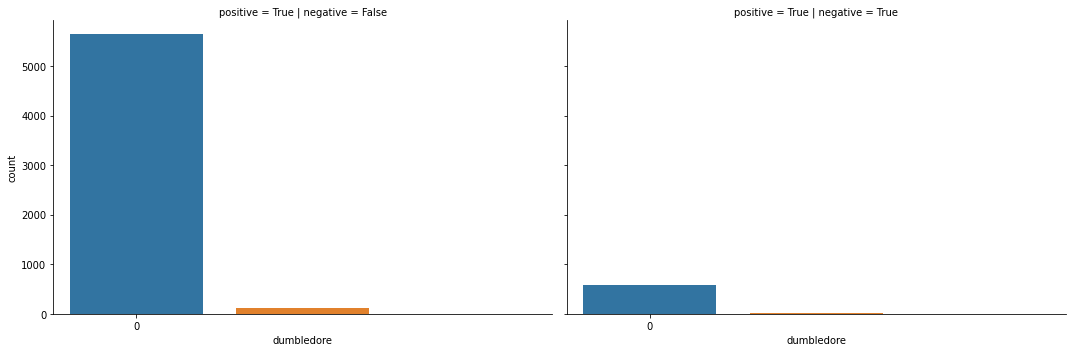

In [ ]:
# time occurences

counts = []
positive = []
negative = []

key = "dumbledore" ##picked because it was on top 5
for row in df.values:
  count = 0
  words = row[1]
  sentiment = row[2]
  if not sentiment == "NaN":
    for word in words:
      if word == key:
        count+=1
  
    counts.append(count)
    if sentiment == 1:
      positive.append(True)
      negative.append(False)
    elif sentiment == 0:
      positive.append(False)
      negative.append(True)
    else:
      positive.append(True)
      negative.append(True)

df_time = pd.DataFrame({
  key: counts,
  "positive": positive,
  "negative": negative
}
)

g = sns.factorplot(x=key, row='positive', col='negative', data=df_time, kind='count', aspect=1.5)
# Make x-axis ticklabels less crowded
ax = g.axes[0, 0]
labels = range(len(ax.get_xticklabels(which='both')))
ax.set_xticks(labels[::5])
ax.set_xticklabels(labels[::5])

"""
P N
T F --> poisitive sentiment
T T --> netural sentiment
F T -> negative sentiments
F F -->
"""

In [ ]:
df_time

,dumbledore,positive,negative
0,0,True,False
1,0,True,False
2,0,True,False
3,0,True,False
4,0,True,False
...,...,...,...
6364,0,True,False
6365,0,True,False
6366,0,True,False
6367,0,True,False


In [ ]:
df_time.groupby(['positive', 'negative'])[key].agg(['mean', 'var'])

mean       var
positive negative                    
True     False     0.022715  0.022897
         True      0.023256  0.022753

In [ ]:
!pip install pymc3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 872 kB 5.2 MB/s 
     |████████████████████████████████| 1.8 MB 52.9 MB/s 
  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.2-py3-none-any.whl size=1529963 sha256=3321f8345eb16f00c4adaabb1010b4110cb001d847a4eca4297554151ca8e302
  Stored in directory: /root/.cache/pip/wheels/0e/41/d2/82c7b771236f987def7fe2e51855cce22b270327f3fedec57c
Successfully built theano-pymc


In [ ]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
%matplotlib inline


fml = f'{key} ~ positive + negative + negative:positive'

with pm.Model() as model4:
    pm.glm.GLM.from_formula(formula=fml, data=df_time, family=pm.glm.families.NegativeBinomial())
    trace = pm.sample(1, cores=2)

We recommend to instead use Bambi https://bambinos.github.io/bambi/


In [ ]:
def strip_derived_rvs(rvs):
    '''Remove PyMC3-generated RVs from a list'''

    ret_rvs = []
    for rv in rvs:
        if not (re.search('_log',rv.name) or re.search('_interval',rv.name)):
            ret_rvs.append(rv)
    return ret_rvs

In [ ]:
rvs = [rv.name for rv in strip_derived_rvs(model4.unobserved_RVs)]
print(rvs)
# with model4:
#     plot_traces(trace[1000:], varnames=rvs);

['Intercept', 'positive[T.True]', 'negative[T.True]', 'negative[T.True]:positive[T.True]', 'mu', 'alpha']


In [ ]:
# np.exp(pm.summary(trace[1000:], varnames=rvs)[['mean','hdi_3%','hdi_97%']])

In [ ]:
pm.summary(trace[:1000])[['mean','hdi_3%','hdi_97%']]

ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
Shape validation failed: input_shape: (2, 1), minimum_shape: (chains=1, draws=4)


,mean,hdi_3%,hdi_97%
Intercept,623.898,8.883,1238.913
positive[T.True],-627.638,-1242.645,-12.632
negative[T.True],-373.400,-454.339,-292.461
negative[T.True]:positive[T.True],373.190,292.365,454.016
mu,19.370,18.542,20.197
alpha,17.709,6.705,28.713


### Conculsion

As per the analysis, we see that the word "dumbledore" has a neural or positive sentiments whenever it used in a sentence.

***Note***: There is a different in the mean value calculated by the sns and pymc3, this is because while running a negative binomial model using pymc3 we are using on 1 sample which a very sample number, however increase the sample space would decrease the differece